In [1]:
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import accuracy_score, classification_report
from sklearn import svm
import matplotlib.pyplot as plt
import missingno as msno 
import numpy as np
import pandas as pd

In [2]:
df1 = pd.read_csv('1year.csv')
df2 = pd.read_csv('2year.csv')
df3 = pd.read_csv('3year.csv')
df4 = pd.read_csv('4year.csv')
df5 = pd.read_csv('5year.csv')

## EDA

### Missing values in dataset

#### If we drop rows that have missing values, we observe that the total number of observations of 5 dataset always drop more than 40%. Which indicate a huge amount of missing values in our data. We plan to use KNNImputer to impute these missing values.

In [3]:
print('Percentage of rows that contain at least 1 missing values in data')
print('Dataset 1:',(df1.dropna(axis = 0).shape[0])/df1.shape[0]*100)
print('Dataset 2:',(df2.dropna(axis = 0).shape[0])/df2.shape[0]*100)
print('Dataset 3:',(df3.dropna(axis = 0).shape[0])/df3.shape[0]*100)
print('Dataset 4:',(df4.dropna(axis = 0).shape[0])/df4.shape[0]*100)
print('Dataset 5:',(df5.dropna(axis = 0).shape[0])/df5.shape[0]*100)

Percentage of rows that contain at least 1 missing values in data
Dataset 1: 45.453251743275935
Dataset 2: 40.18480290966283
Dataset 3: 46.51052080357993
Dataset 4: 48.70302287581699
Dataset 5: 51.28595600676819


## Heatmap for missing values

<Axes: >

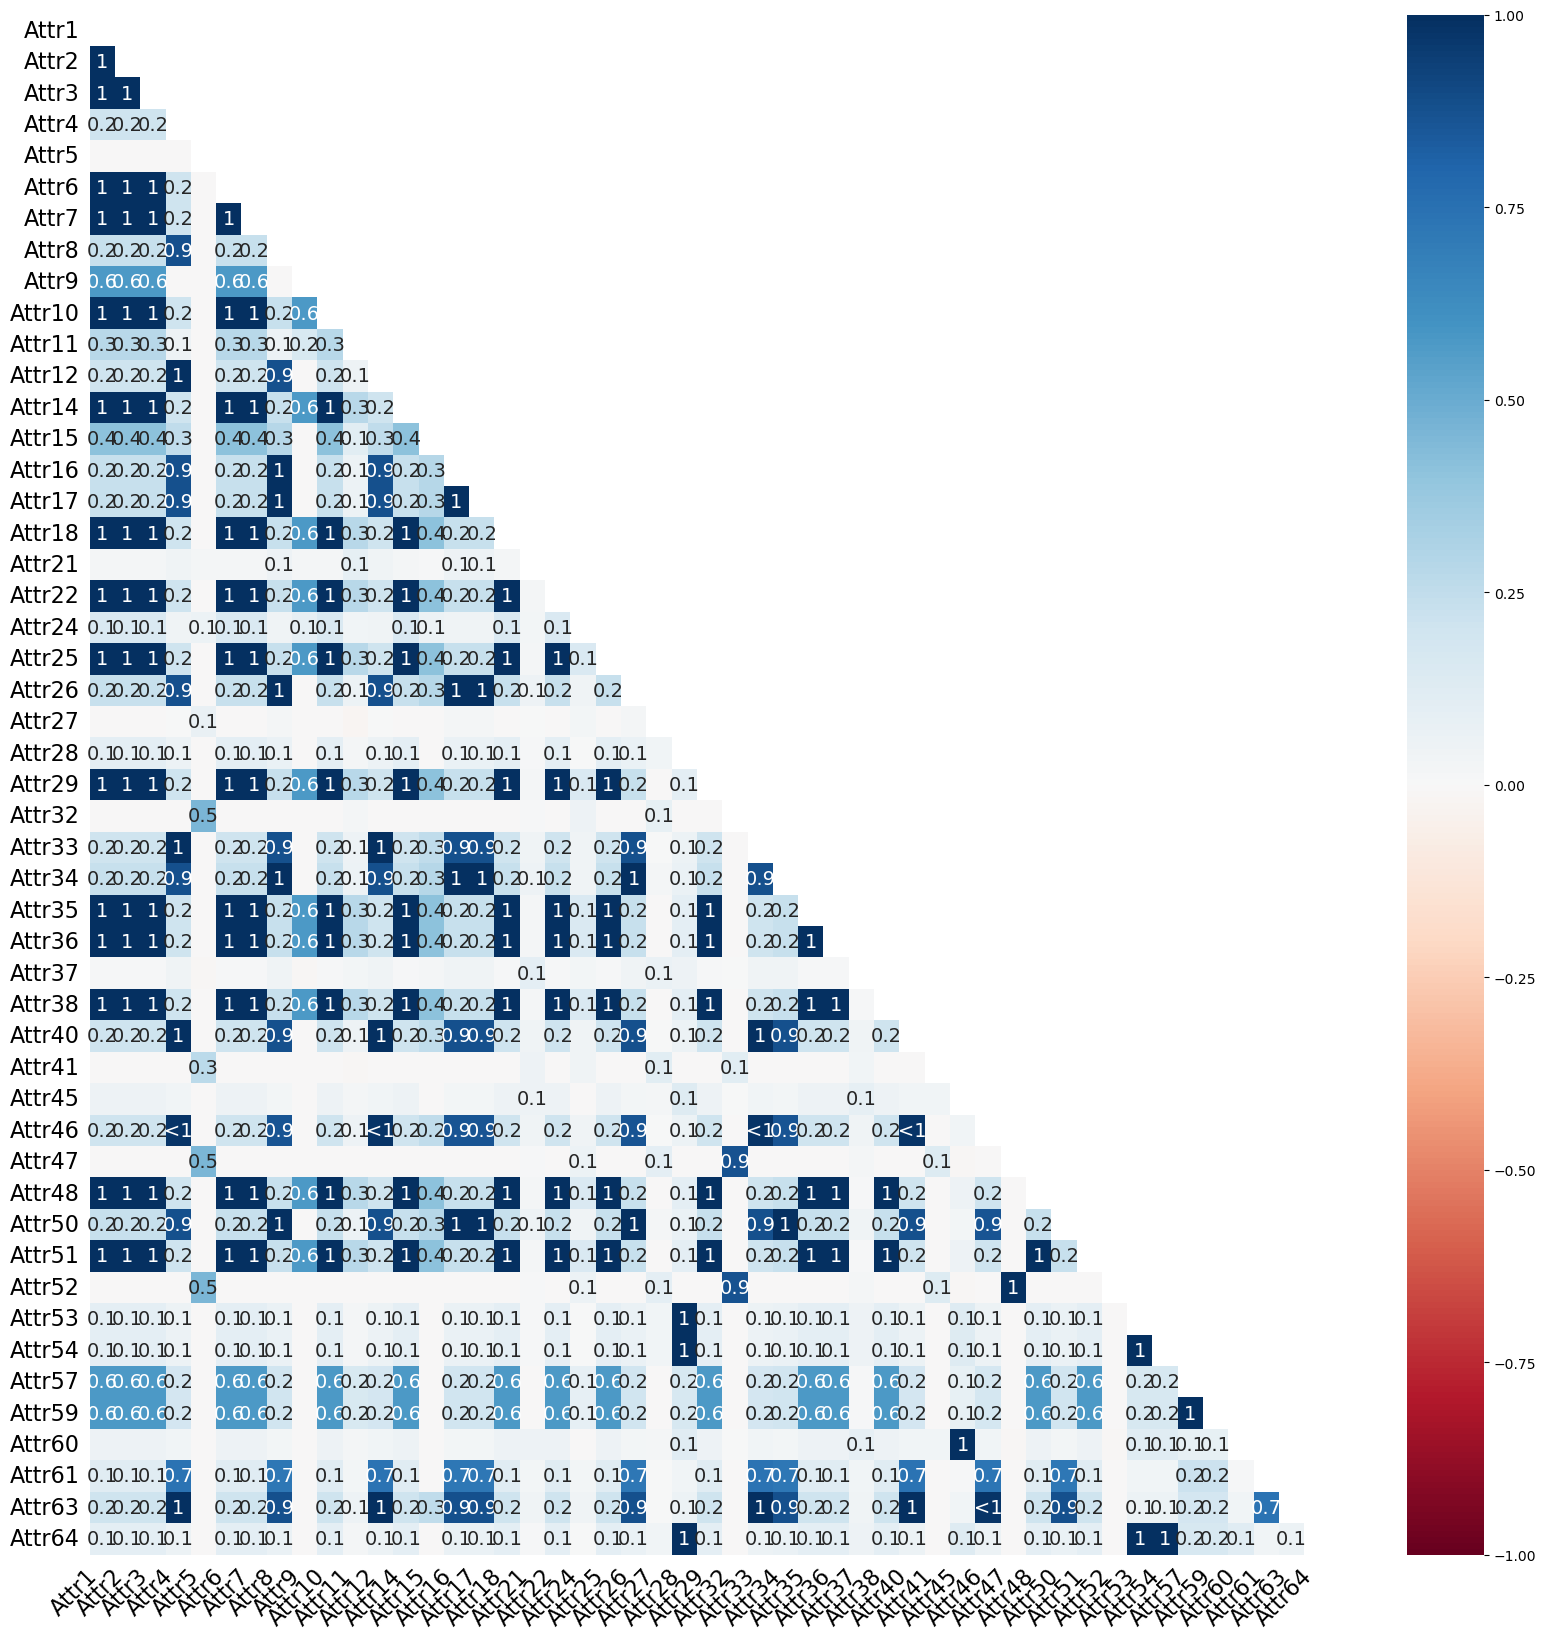

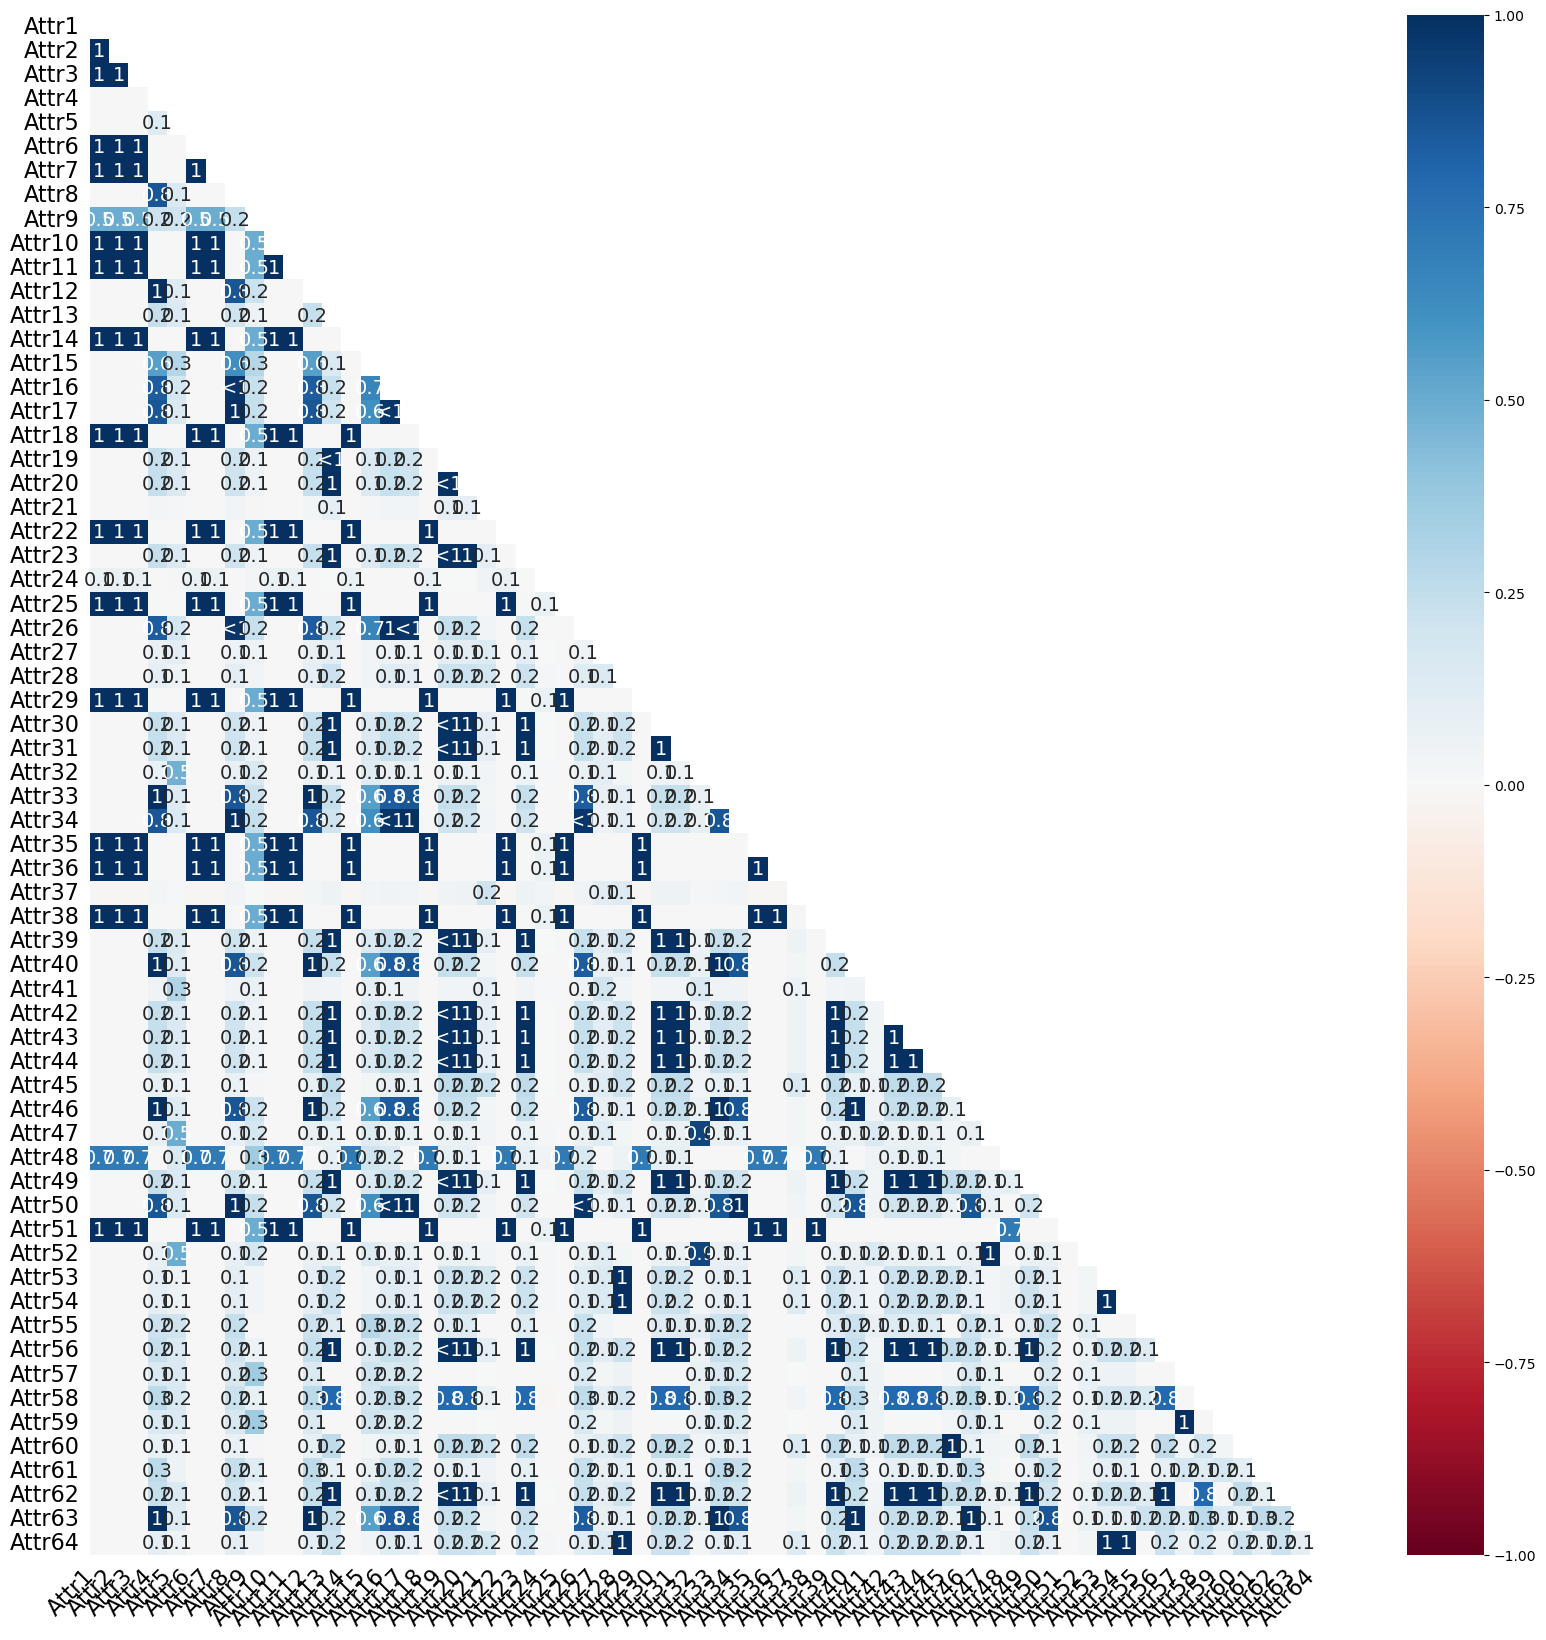

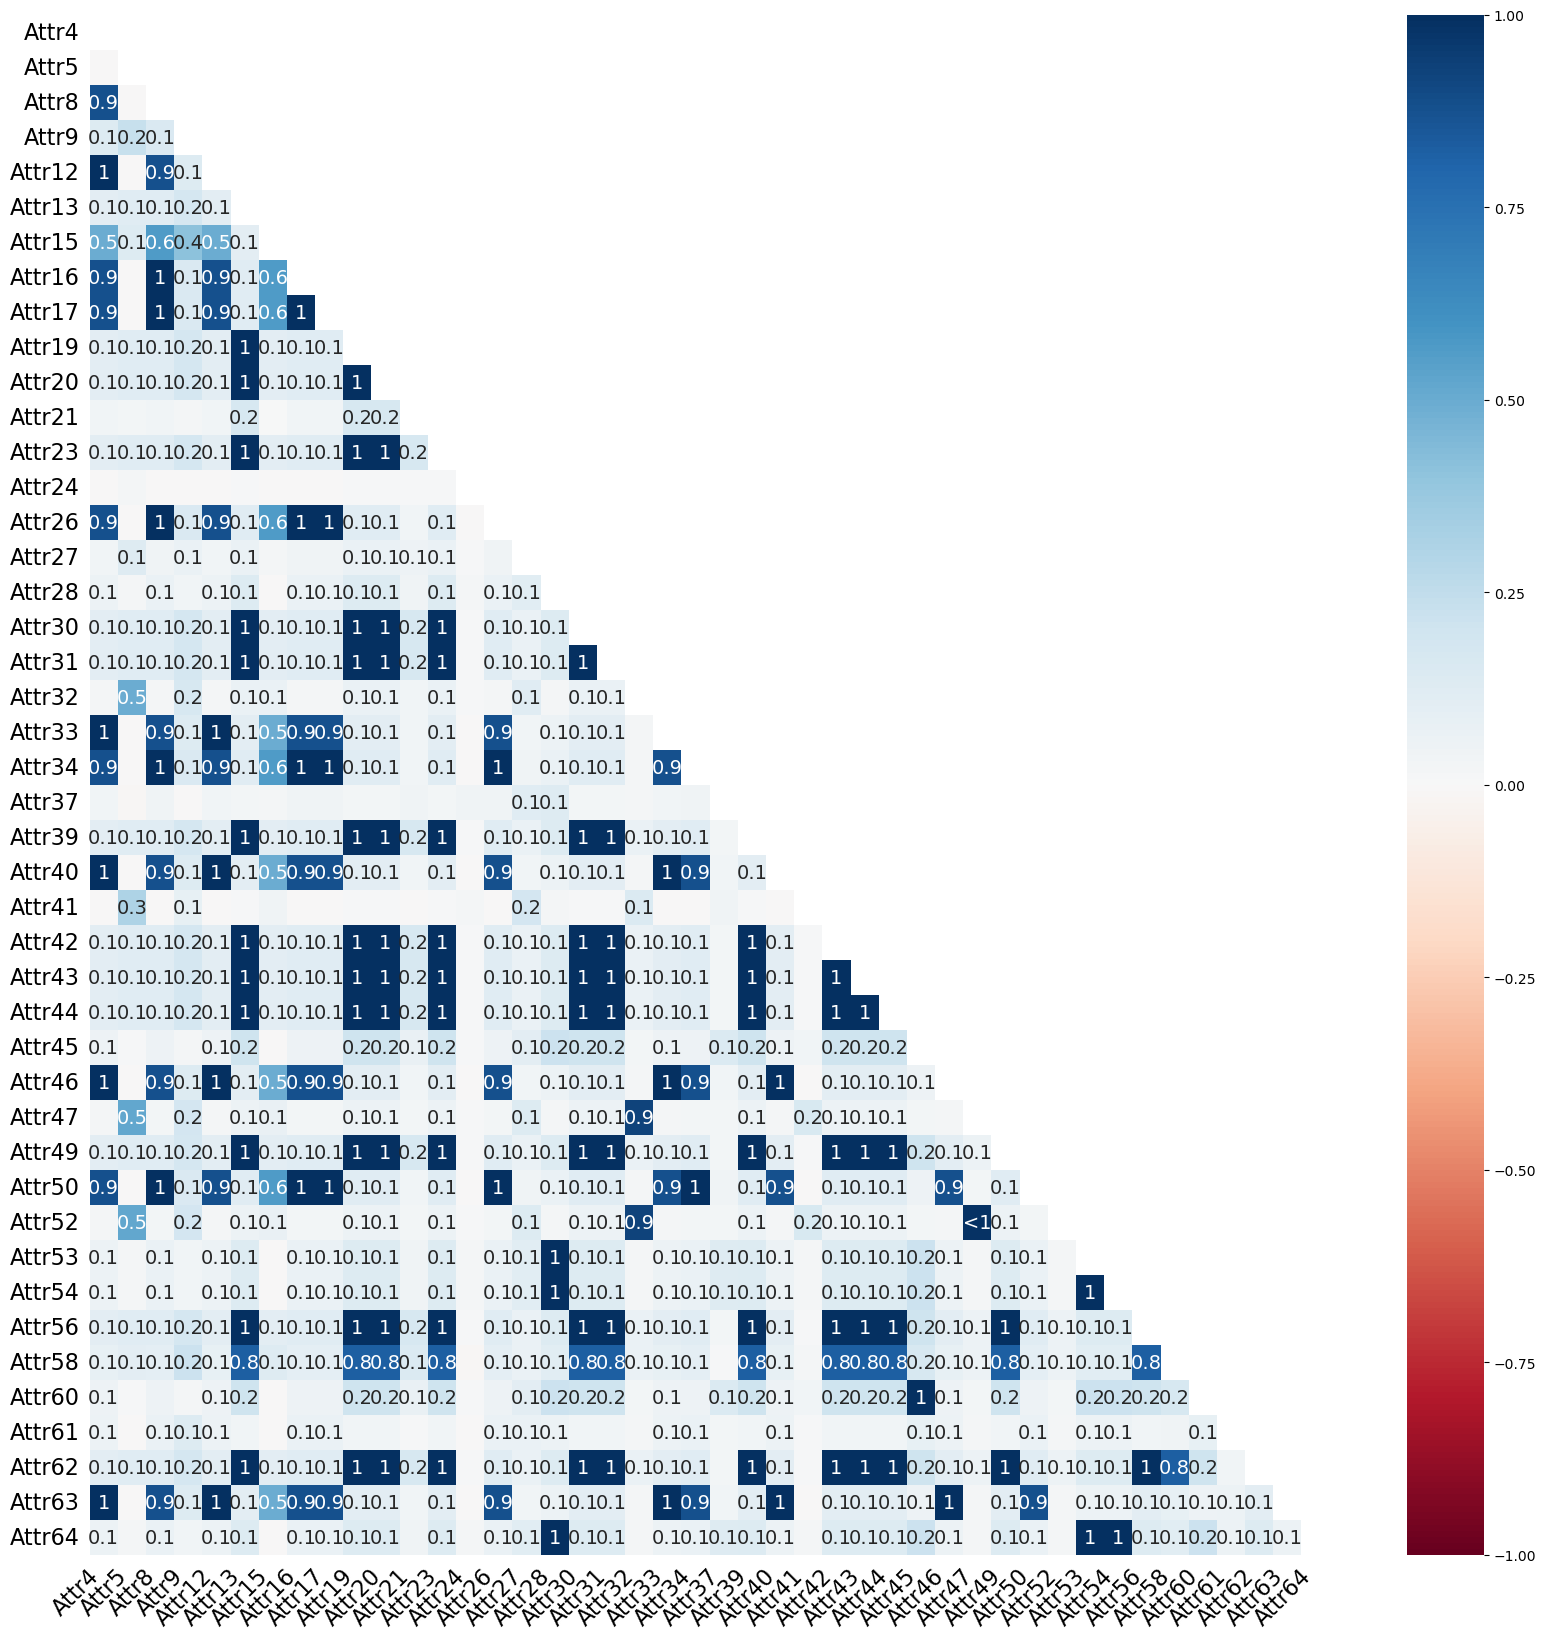

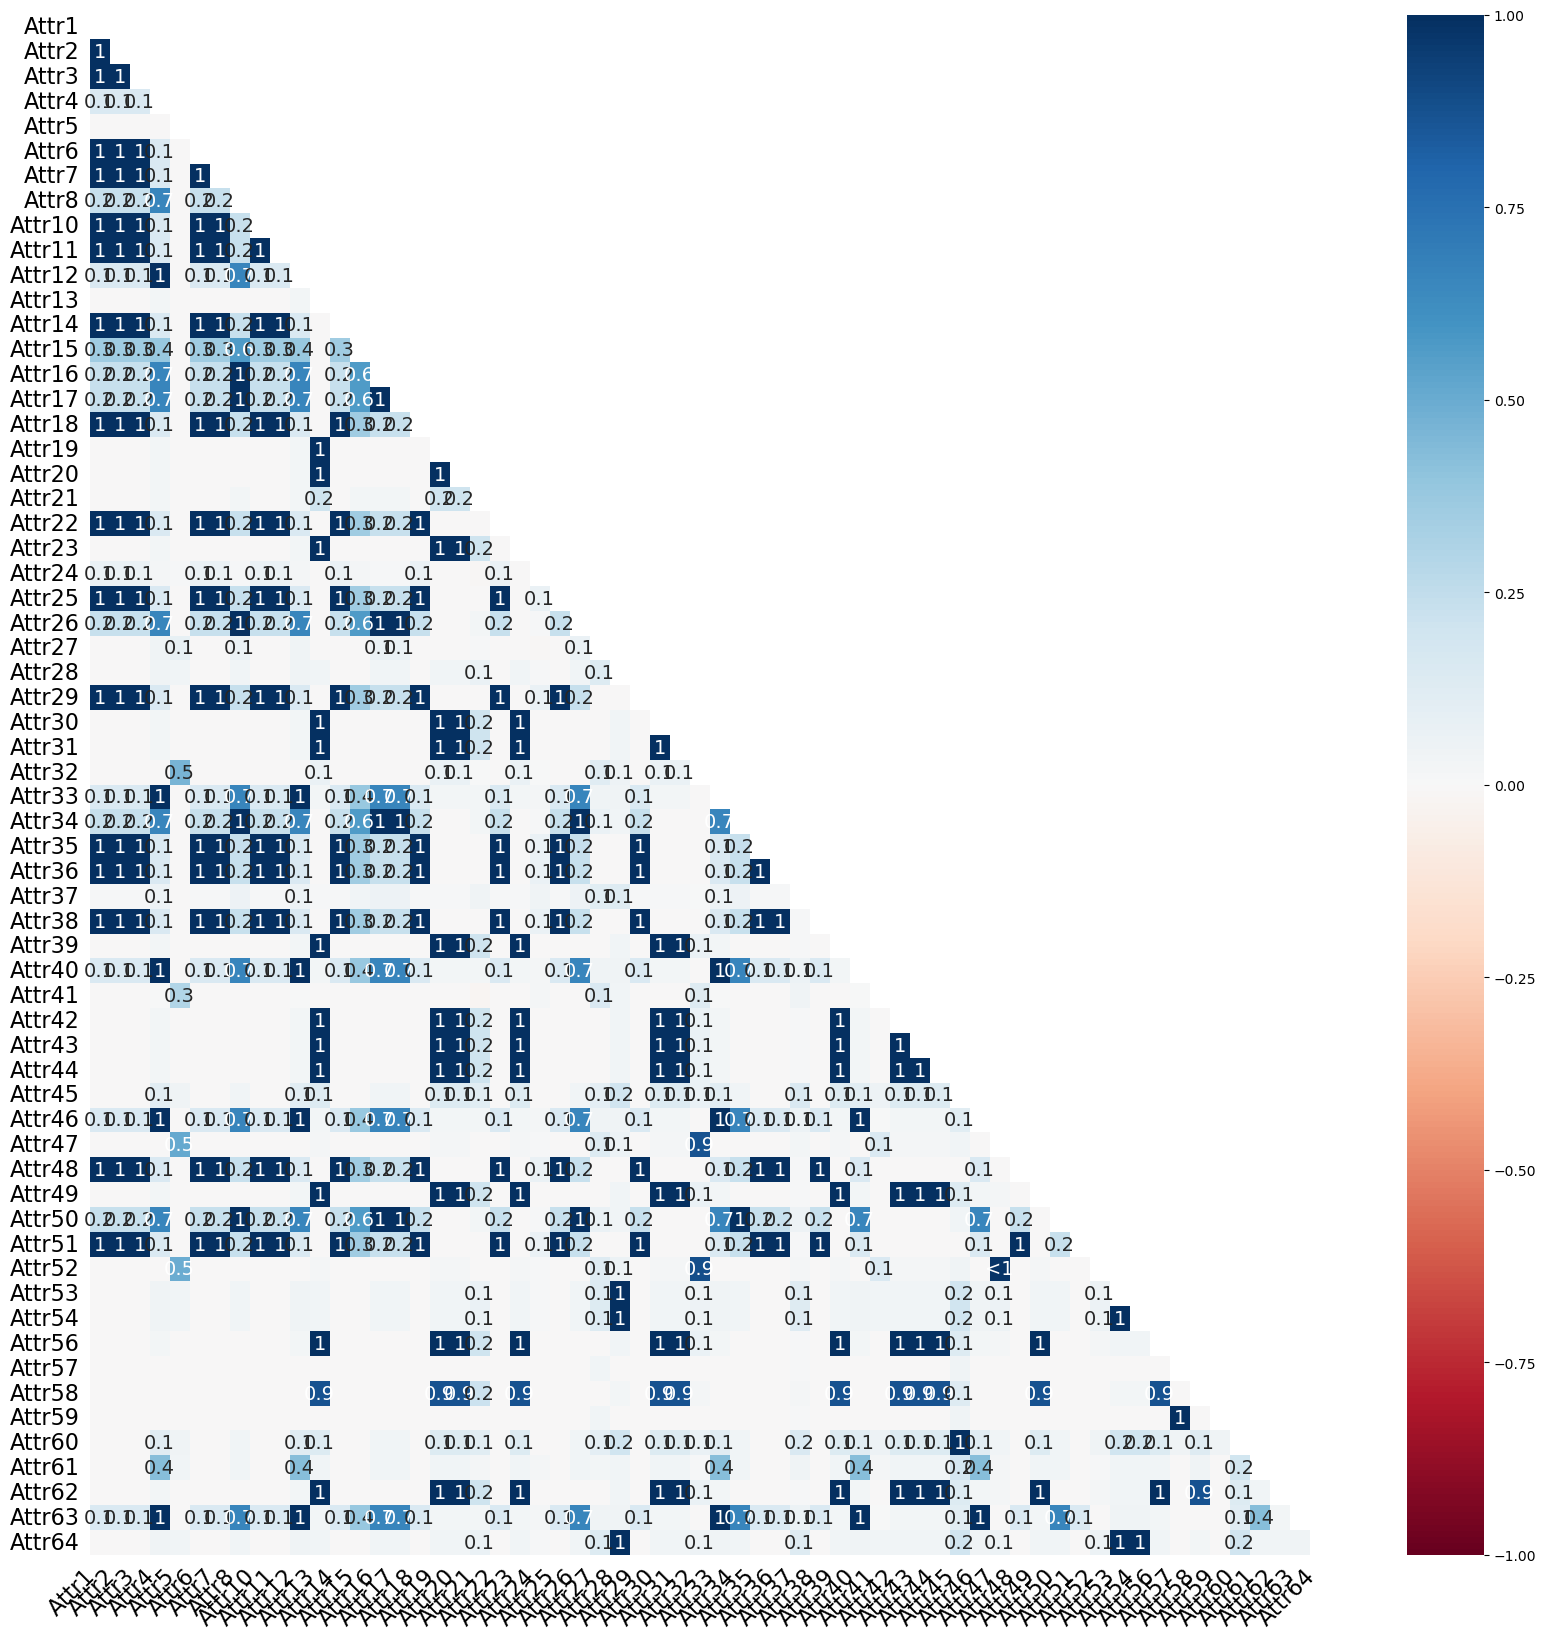

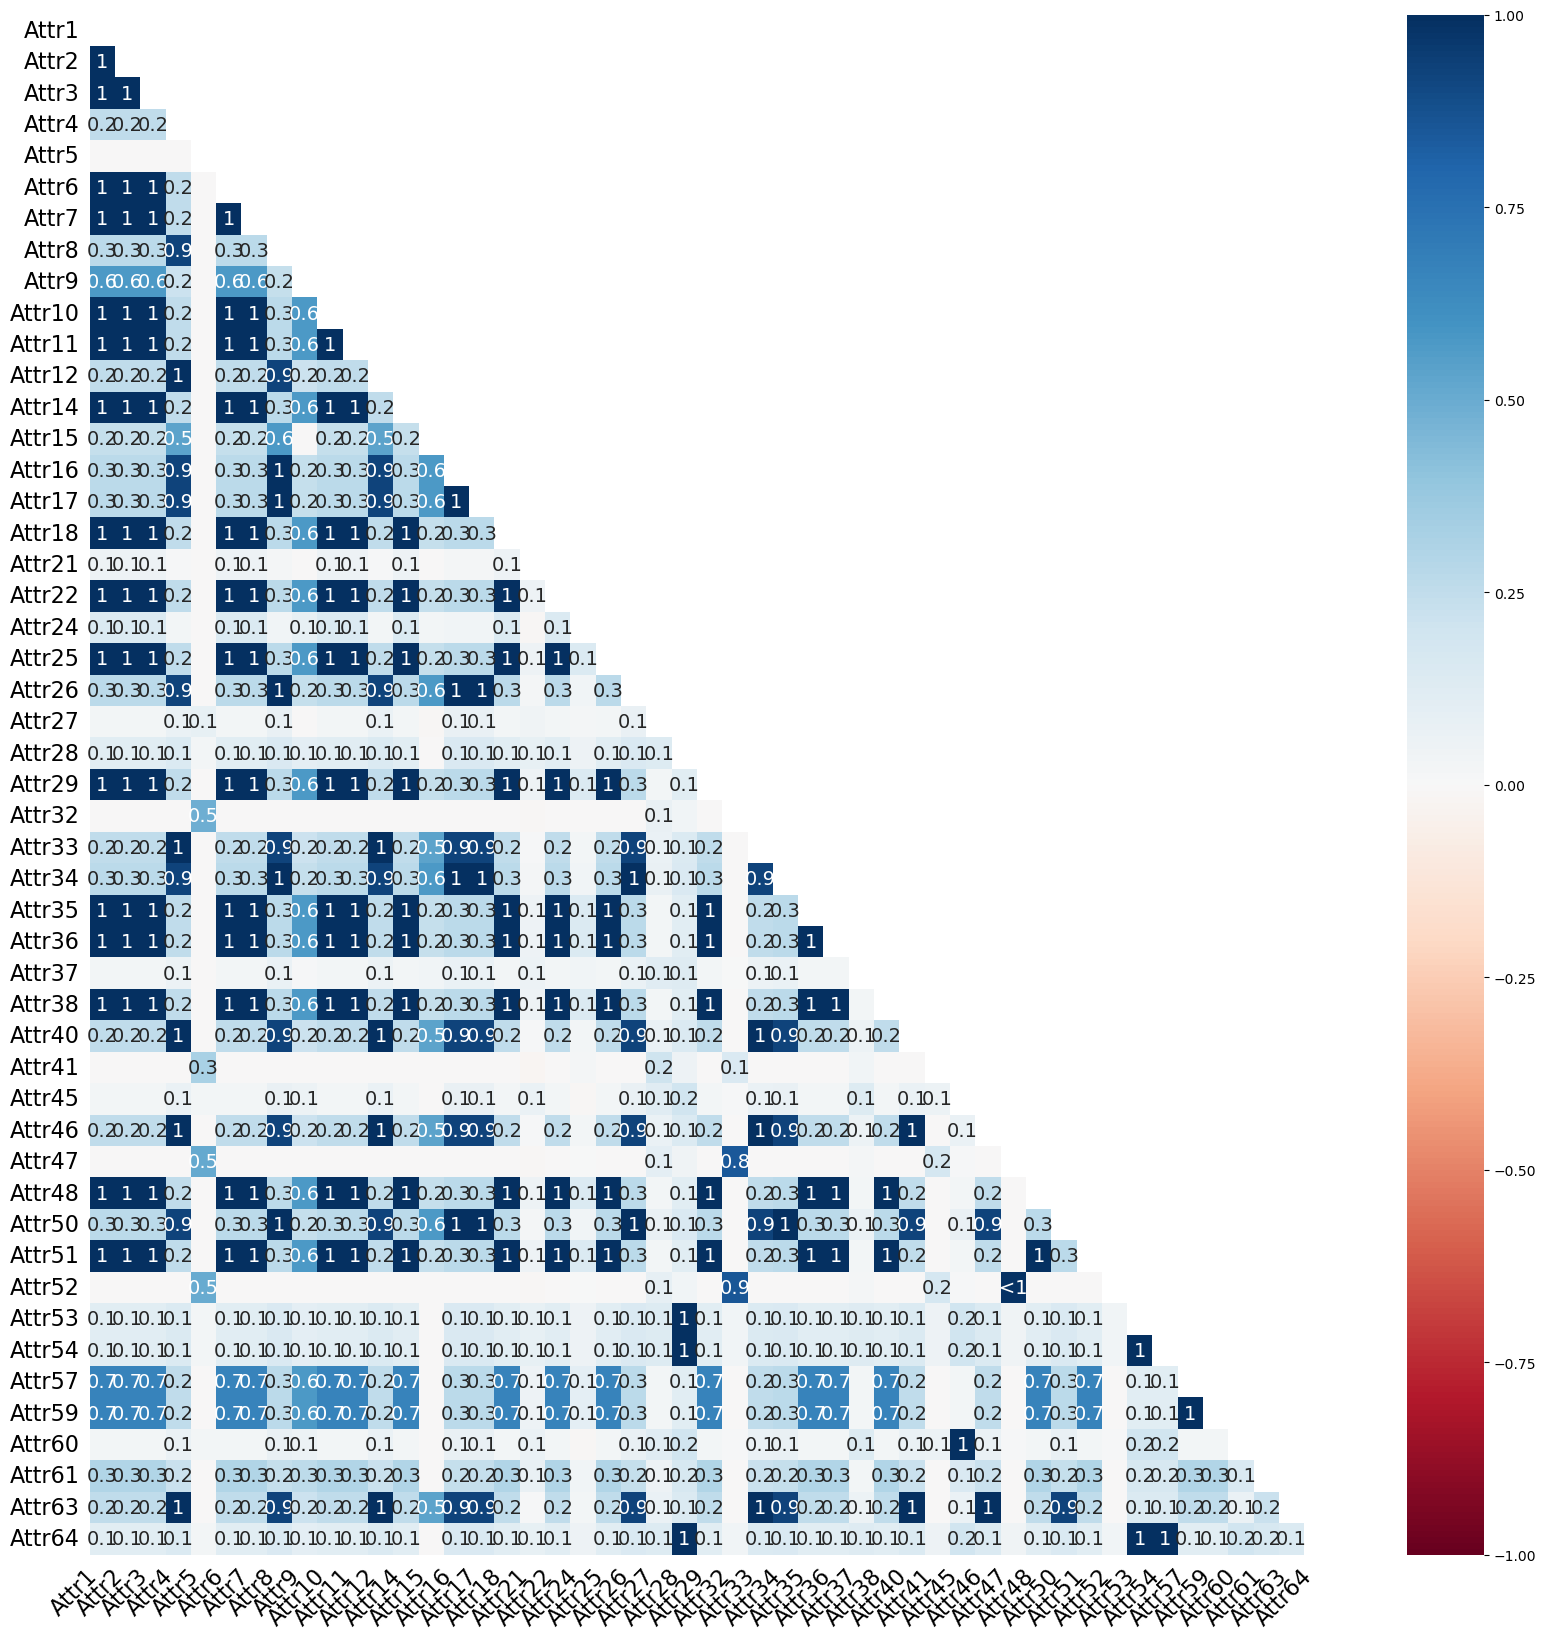

In [4]:
missing1 = df1.columns[df1.isnull().any()].tolist()
msno.heatmap(df1[missing1], figsize = (20,20))
missing2 = df2.columns[df2.isnull().any()].tolist()
msno.heatmap(df2[missing2], figsize = (20,20))
missing3 = df3.columns[df3.isnull().any()].tolist()
msno.heatmap(df3[missing3], figsize = (20,20))
missing4 = df4.columns[df4.isnull().any()].tolist()
msno.heatmap(df4[missing4], figsize = (20,20))
missing5 = df5.columns[df5.isnull().any()].tolist()
msno.heatmap(df5[missing5], figsize = (20,20))

### Imbalance

#### We calculate number of observations of different classes. We notice severe imbalance problem in our data, we consider using SMOTE to fix this problem

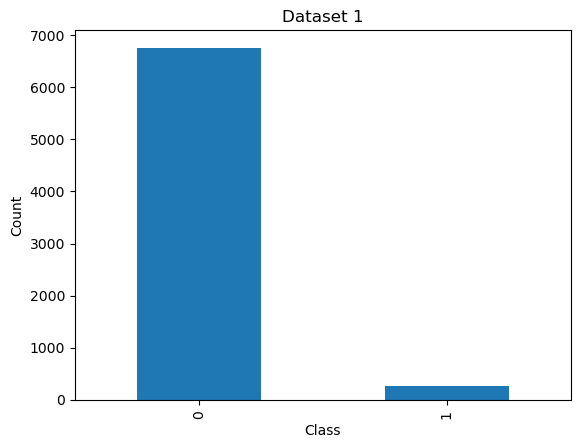

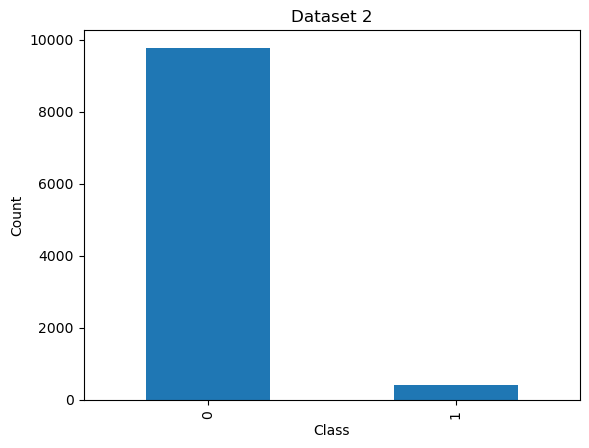

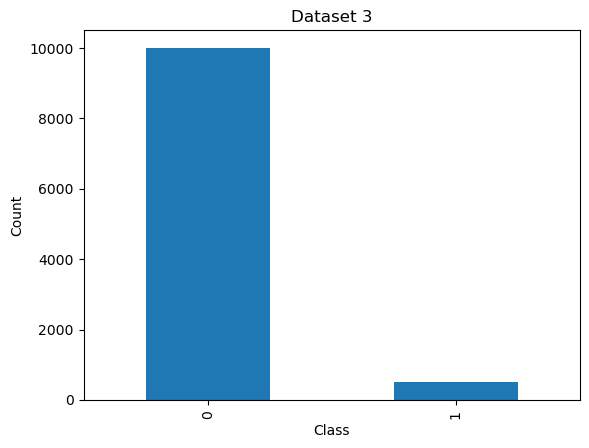

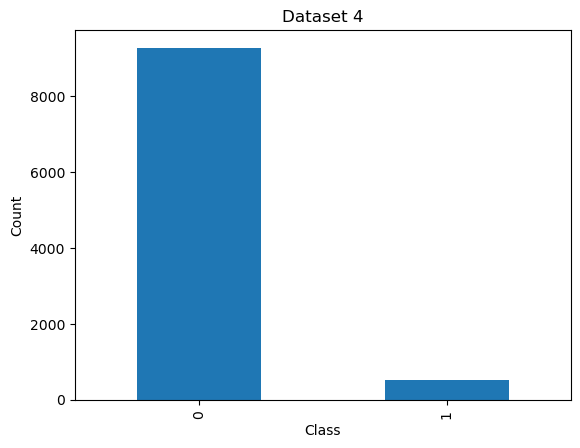

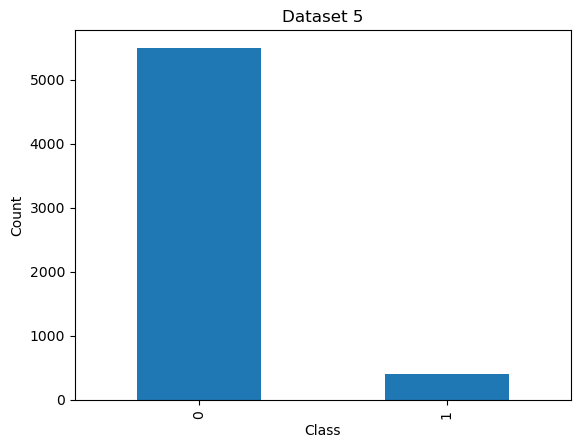

In [5]:
class_counts = df1['class'].value_counts()
class_counts1 = df2['class'].value_counts()
class_counts2 = df3['class'].value_counts()
class_counts3 = df4['class'].value_counts()
class_counts4 = df5['class'].value_counts()

class_counts.plot(kind='bar', title='Dataset 1')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
class_counts1.plot(kind='bar', title='Dataset 2')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
class_counts2.plot(kind='bar', title='Dataset 3')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
class_counts3.plot(kind='bar', title='Dataset 4')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()
class_counts4.plot(kind='bar', title='Dataset 5')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

### In conclusion, from EDA, we explore that our data is suffering from many problems like missing values, imbalance. We will try our best to solve these challenges so that our models can predict better

## Data preprocessing

In [6]:
def data_preprocessing(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    #Impute missing values using KNN
    knn = KNNImputer()
    X_train_imputed = knn.fit_transform(X_train)
    X_test_imputed = knn.transform(X_test)
    
    #Standardize the data
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train_imputed)
    X_test_scaled = scaler.fit_transform(X_test_imputed)
    
    #Using SMOTE to counter imbalance
    smote = SMOTE(random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)
   
    #Feature selection using SelectBest
    selector = SelectKBest(score_func=f_classif, k=10)
    X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
    X_test_selected = selector.transform(X_test_scaled)
    
    return X_train_selected, X_test_selected, y_train_resampled, y_test

## Dataset 1

In [7]:
X1 = df1.drop('class',axis = 1)
y1 = df1['class']
X_train,X_test,y_train, y_test = data_preprocessing(X1,y1)

### Logistic Regression 

In [8]:
lg1 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42)
lg1.fit(X_train,y_train)
y_probs = lg1.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
y_pred = lg1.predict(X_test)

### Decision Tree

In [9]:
dt1 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state = 42)
dt1.fit(X_train,y_train)
y_probs1 = dt1.predict_proba(X_test)[:, 1] 
auc_score1 = roc_auc_score(y_test, y_probs1)
y_pred1 = dt1.predict(X_test)

### Random Forest

In [10]:
rf1 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf1.fit(X_train,y_train)
y_probs2 = rf1.predict_proba(X_test)[:, 1]  
auc_score2 = roc_auc_score(y_test, y_probs2)
y_pred2 = rf1.predict(X_test)

### Neural Network

In [11]:
nn1 = Sequential()
nn1.add(Dense(64, activation='relu', input_shape= (X_train.shape[1],)))
nn1.add(Dense(32, activation='relu'))
nn1.add(Dense(1, activation='sigmoid'))

# Compile the model
nn1.compile(loss='binary_crossentropy',optimizer='adam')

# Train the model
nn1.fit(X_train, y_train, batch_size=1, epochs=1)
y_probs3 = nn1.predict(X_test).flatten() 
auc_score3 = roc_auc_score(y_test, y_probs3)
y_pred3 = nn1.predict(X_test)
y_pred3 = [1 if x >0.5 else 0 for x in y_pred3]

C:\Users\phuon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


10802/10802 ━━━━━━━━━━━━━━━━━━━━ 21s 2ms/step - loss: 0.6349
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
44/44 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Support Vector Machine

In [12]:
svm1 = svm.SVC(kernel='rbf', probability=True, random_state=42)
svm1.fit(X_train,y_train)
y_probs4 = svm1.predict_proba(X_test)[:,1] 
auc_score4 = roc_auc_score(y_test, y_probs4)
y_pred4 = svm1.predict(X_test)

### Results on dataset 1

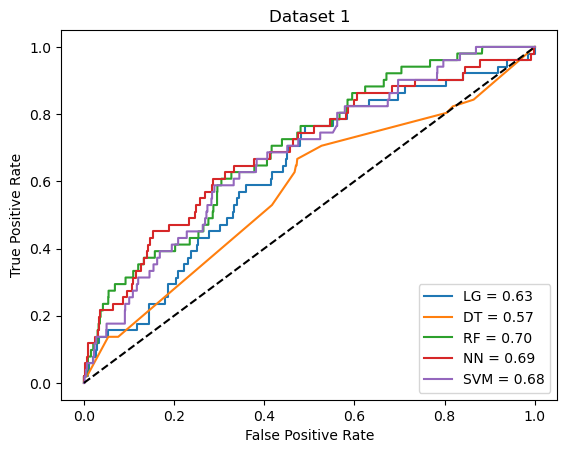

              precision    recall  f1-score   support

           0       0.97      0.60      0.75      1355
           1       0.05      0.59      0.10        51

    accuracy                           0.60      1406
   macro avg       0.51      0.60      0.42      1406
weighted avg       0.94      0.60      0.72      1406
               precision    recall  f1-score   support

           0       0.98      0.53      0.69      1355
           1       0.05      0.65      0.09        51

    accuracy                           0.53      1406
   macro avg       0.51      0.59      0.39      1406
weighted avg       0.94      0.53      0.67      1406
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      1355
           1       0.16      0.27      0.20        51

    accuracy                           0.92      1406
   macro avg       0.56      0.61      0.58      1406
weighted avg       0.94      0.92      0.93      1406
               preci

In [13]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_probs4)
plt.plot(fpr, tpr, label='LG = {:.2f}'.format(auc_score))
plt.plot(fpr1, tpr1, label='DT = {:.2f}'.format(auc_score1))
plt.plot(fpr2, tpr2, label='RF = {:.2f}'.format(auc_score2))
plt.plot(fpr3, tpr3, label='NN = {:.2f}'.format(auc_score3))
plt.plot(fpr4, tpr4, label='SVM = {:.2f}'.format(auc_score4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 1')
plt.legend(loc='lower right')
plt.show()
class_report = classification_report(y_test, y_pred)
class_report1 = classification_report(y_test, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
class_report3 = classification_report(y_test, y_pred3)
class_report4 = classification_report(y_test, y_pred4)
print(class_report,class_report1,class_report2,class_report3,class_report4)

## Dataset 2

In [15]:
X2 = df2.drop('class',axis = 1)
y2 = df2['class']
X_train,X_test,y_train, y_test = data_preprocessing(X2,y2)

### Logistic Regression

In [16]:
lg2 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42)
lg2.fit(X_train,y_train)
y_probs = lg2.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
y_pred = lg2.predict(X_test)

### Decision Tree

In [17]:
dt2 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state = 42)
dt2.fit(X_train,y_train)
y_probs1 = dt2.predict_proba(X_test)[:, 1] 
auc_score1 = roc_auc_score(y_test, y_probs1)
y_pred1 = dt2.predict(X_test)

### Random Forest

In [18]:
rf2 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf2.fit(X_train,y_train)
y_probs2 = rf2.predict_proba(X_test)[:, 1]  
auc_score2 = roc_auc_score(y_test, y_probs2)
y_pred2 = rf2.predict(X_test)

### Neural Network

In [19]:
nn2 = Sequential()
nn2.add(Dense(64, activation='relu', input_shape= (X_train.shape[1],)))
nn2.add(Dense(32, activation='relu'))
nn2.add(Dense(1, activation='sigmoid'))

# Compile the model
nn2.compile(loss='binary_crossentropy',optimizer='adam')

# Train the model
nn2.fit(X_train, y_train, batch_size=1, epochs=1)
y_probs3 = nn2.predict(X_test).flatten() 
auc_score3 = roc_auc_score(y_test, y_probs3)
y_pred3 = nn2.predict(X_test)
y_pred3 = [1 if x >0.5 else 0 for x in y_pred3]

C:\Users\phuon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


15618/15618 ━━━━━━━━━━━━━━━━━━━━ 26s 2ms/step - loss: 0.6604
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
64/64 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Support Vector Machine 

In [20]:
svm2 = svm.SVC(kernel='rbf', probability=True, random_state=42)
svm2.fit(X_train,y_train)
y_probs4 = svm2.predict_proba(X_test)[:,1] 
auc_score4 = roc_auc_score(y_test, y_probs4)
y_pred4 = svm2.predict(X_test)

### Results on dataset 2


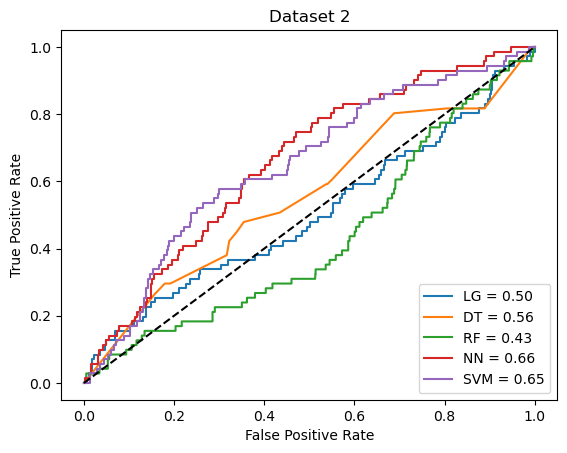

              precision    recall  f1-score   support

           0       0.96      0.52      0.67      1964
           1       0.03      0.44      0.06        71

    accuracy                           0.51      2035
   macro avg       0.50      0.48      0.37      2035
weighted avg       0.93      0.51      0.65      2035
               precision    recall  f1-score   support

           0       0.97      0.68      0.80      1964
           1       0.05      0.42      0.08        71

    accuracy                           0.67      2035
   macro avg       0.51      0.55      0.44      2035
weighted avg       0.94      0.67      0.77      2035
               precision    recall  f1-score   support

           0       0.97      0.98      0.97      1964
           1       0.04      0.03      0.03        71

    accuracy                           0.94      2035
   macro avg       0.50      0.50      0.50      2035
weighted avg       0.93      0.94      0.94      2035
               preci

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_probs4)
plt.plot(fpr, tpr, label='LG = {:.2f}'.format(auc_score))
plt.plot(fpr1, tpr1, label='DT = {:.2f}'.format(auc_score1))
plt.plot(fpr2, tpr2, label='RF = {:.2f}'.format(auc_score2))
plt.plot(fpr3, tpr3, label='NN = {:.2f}'.format(auc_score3))
plt.plot(fpr4, tpr4, label='SVM = {:.2f}'.format(auc_score4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 2')
plt.legend(loc='lower right')
plt.show()
class_report = classification_report(y_test, y_pred)
class_report1 = classification_report(y_test, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
class_report3 = classification_report(y_test, y_pred3)
class_report4 = classification_report(y_test, y_pred4)
print(class_report,class_report1,class_report2,class_report3,class_report4)

## Dataset 3

In [22]:
X3 = df3.drop('class',axis = 1)
y3 = df3['class']
X_train,X_test,y_train, y_test = data_preprocessing(X3,y3)

### Logistic Regression

In [23]:
lg3 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42)
lg3.fit(X_train,y_train)
y_probs = lg3.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
y_pred = lg3.predict(X_test)

### Decision Tree

In [24]:
dt3 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state = 42)
dt3.fit(X_train,y_train)
y_probs1 = dt3.predict_proba(X_test)[:, 1] 
auc_score1 = roc_auc_score(y_test, y_probs1)
y_pred1 = dt3.predict(X_test)

### Random Forest

In [25]:
rf3 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf3.fit(X_train,y_train)
y_probs2 = rf3.predict_proba(X_test)[:, 1]  
auc_score2 = roc_auc_score(y_test, y_probs2)
y_pred2 = rf3.predict(X_test)

### Neural Network

In [26]:
nn3 = Sequential()
nn3.add(Dense(64, activation='relu', input_shape= (X_train.shape[1],)))
nn3.add(Dense(32, activation='relu'))
nn3.add(Dense(1, activation='sigmoid'))

# Compile the model
nn3.compile(loss='binary_crossentropy',optimizer='adam')

# Train the model
nn3.fit(X_train, y_train, batch_size=1, epochs=1)
y_probs3 = nn3.predict(X_test).flatten() 
auc_score3 = roc_auc_score(y_test, y_probs3)
y_pred3 = nn3.predict(X_test)
y_pred3 = [1 if x >0.5 else 0 for x in y_pred3]

C:\Users\phuon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


16028/16028 ━━━━━━━━━━━━━━━━━━━━ 23s 1ms/step - loss: 0.6293
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


### Support Vector Machine

In [27]:
svm3 = svm.SVC(kernel='rbf', probability=True, random_state=42)
svm3.fit(X_train,y_train)
y_probs4 = svm3.predict_proba(X_test)[:,1] 
auc_score4 = roc_auc_score(y_test, y_probs4)
y_pred4 = svm3.predict(X_test)

### Results on dataset 3

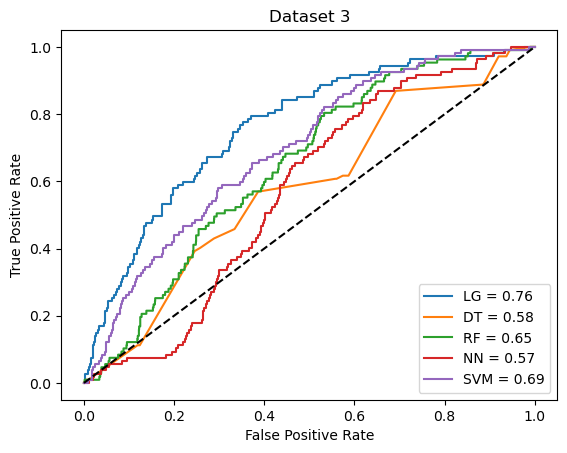

              precision    recall  f1-score   support

           0       0.99      0.48      0.64      1994
           1       0.08      0.89      0.15       107

    accuracy                           0.50      2101
   macro avg       0.54      0.68      0.40      2101
weighted avg       0.94      0.50      0.62      2101
               precision    recall  f1-score   support

           0       0.96      0.61      0.75      1994
           1       0.07      0.57      0.13       107

    accuracy                           0.61      2101
   macro avg       0.52      0.59      0.44      2101
weighted avg       0.92      0.61      0.72      2101
               precision    recall  f1-score   support

           0       0.95      0.89      0.92      1994
           1       0.05      0.12      0.07       107

    accuracy                           0.85      2101
   macro avg       0.50      0.50      0.50      2101
weighted avg       0.90      0.85      0.87      2101
               preci

In [28]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_probs4)
plt.plot(fpr, tpr, label='LG = {:.2f}'.format(auc_score))
plt.plot(fpr1, tpr1, label='DT = {:.2f}'.format(auc_score1))
plt.plot(fpr2, tpr2, label='RF = {:.2f}'.format(auc_score2))
plt.plot(fpr3, tpr3, label='NN = {:.2f}'.format(auc_score3))
plt.plot(fpr4, tpr4, label='SVM = {:.2f}'.format(auc_score4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 3')
plt.legend(loc='lower right')
plt.show()
class_report = classification_report(y_test, y_pred)
class_report1 = classification_report(y_test, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
class_report3 = classification_report(y_test, y_pred3)
class_report4 = classification_report(y_test, y_pred4)
print(class_report,class_report1,class_report2,class_report3,class_report4)

## Dataset 4

In [29]:
X4 = df4.drop('class',axis = 1)
y4 = df4['class']
X_train,X_test,y_train, y_test = data_preprocessing(X4,y4)

### Logistic Regression

In [30]:
lg4 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42)
lg4.fit(X_train,y_train)
y_probs = lg4.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
y_pred = lg4.predict(X_test)

### Decision Tree

In [31]:
dt4 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state = 42)
dt4.fit(X_train,y_train)
y_probs1 = dt4.predict_proba(X_test)[:, 1] 
auc_score1 = roc_auc_score(y_test, y_probs1)
y_pred1 = dt4.predict(X_test)

### Random Forest

In [32]:
rf4 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf4.fit(X_train,y_train)
y_probs2 = rf4.predict_proba(X_test)[:, 1]  
auc_score2 = roc_auc_score(y_test, y_probs2)
y_pred2 = rf4.predict(X_test)

### Neural Network

In [33]:
nn4 = Sequential()
nn4.add(Dense(64, activation='relu', input_shape= (X_train.shape[1],)))
nn4.add(Dense(32, activation='relu'))
nn4.add(Dense(1, activation='sigmoid'))

# Compile the model
nn4.compile(loss='binary_crossentropy',optimizer='adam')

# Train the model
nn4.fit(X_train, y_train, batch_size=1, epochs=1)
y_probs3 = nn4.predict(X_test).flatten() 
auc_score3 = roc_auc_score(y_test, y_probs3)
y_pred3 = nn4.predict(X_test)
y_pred3 = [1 if x >0.5 else 0 for x in y_pred3]

C:\Users\phuon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


14842/14842 ━━━━━━━━━━━━━━━━━━━━ 19s 1ms/step - loss: 0.6144
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


### Support Vector Machine

In [34]:
svm4 = svm.SVC(kernel='rbf', probability=True, random_state=42)
svm4.fit(X_train,y_train)
y_probs4 = svm4.predict_proba(X_test)[:,1] 
auc_score4 = roc_auc_score(y_test, y_probs4)
y_pred4 = svm4.predict(X_test)

### Results on dataset 4

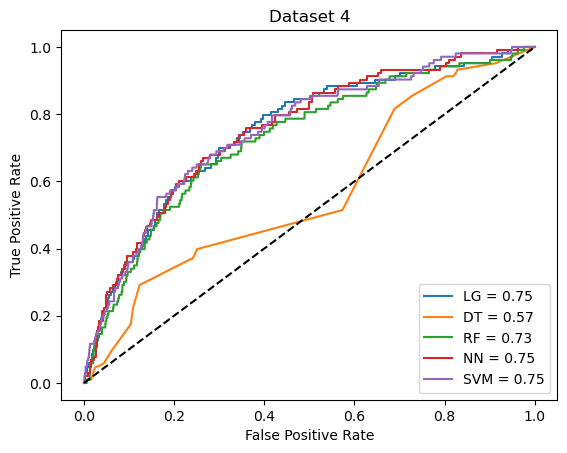

              precision    recall  f1-score   support

           0       0.97      0.71      0.82      1856
           1       0.11      0.65      0.19       103

    accuracy                           0.70      1959
   macro avg       0.54      0.68      0.50      1959
weighted avg       0.93      0.70      0.79      1959
               precision    recall  f1-score   support

           0       0.95      0.90      0.92      1856
           1       0.09      0.17      0.11       103

    accuracy                           0.86      1959
   macro avg       0.52      0.54      0.52      1959
weighted avg       0.91      0.86      0.88      1959
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1856
           1       0.16      0.23      0.19       103

    accuracy                           0.90      1959
   macro avg       0.56      0.58      0.57      1959
weighted avg       0.91      0.90      0.90      1959
               preci

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_probs4)
plt.plot(fpr, tpr, label='LG = {:.2f}'.format(auc_score))
plt.plot(fpr1, tpr1, label='DT = {:.2f}'.format(auc_score1))
plt.plot(fpr2, tpr2, label='RF = {:.2f}'.format(auc_score2))
plt.plot(fpr3, tpr3, label='NN = {:.2f}'.format(auc_score3))
plt.plot(fpr4, tpr4, label='SVM = {:.2f}'.format(auc_score4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 4')
plt.legend(loc='lower right')
plt.show()
class_report = classification_report(y_test, y_pred)
class_report1 = classification_report(y_test, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
class_report3 = classification_report(y_test, y_pred3)
class_report4 = classification_report(y_test, y_pred4)
print(class_report,class_report1,class_report2,class_report3,class_report4)

## Dataset 5

In [36]:
X5 = df5.drop('class',axis = 1)
y5 = df5['class']
X_train,X_test,y_train, y_test = data_preprocessing(X5,y5)

### Logistic Regression

In [37]:
lg5 = LogisticRegression(penalty='l2', C=1.0, solver='lbfgs', max_iter=1000, random_state=42)
lg5.fit(X_train,y_train)
y_probs = lg5.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_probs)
y_pred = lg5.predict(X_test)

### Decision Tree

In [38]:
dt5 = DecisionTreeClassifier(criterion='gini', max_depth=5, min_samples_split=10, min_samples_leaf=5,random_state = 42)
dt5.fit(X_train,y_train)
y_probs1 = dt5.predict_proba(X_test)[:, 1] 
auc_score1 = roc_auc_score(y_test, y_probs1)
y_pred1 = dt5.predict(X_test)

### Random Forest

In [39]:
rf5 = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=5, min_samples_leaf=2, max_features='sqrt', random_state=42)
rf5.fit(X_train,y_train)
y_probs2 = rf5.predict_proba(X_test)[:, 1]  
auc_score2 = roc_auc_score(y_test, y_probs2)
y_pred2 = rf5.predict(X_test)

### Neural Network

In [40]:
nn5 = Sequential()
nn5.add(Dense(64, activation='relu', input_shape= (X_train.shape[1],)))
nn5.add(Dense(32, activation='relu'))
nn5.add(Dense(1, activation='sigmoid'))

# Compile the model
nn5.compile(loss='binary_crossentropy',optimizer='adam')

# Train the model
nn5.fit(X_train, y_train, batch_size=1, epochs=1)
y_probs3 = nn5.predict(X_test).flatten() 
auc_score3 = roc_auc_score(y_test, y_probs3)
y_pred3 = nn5.predict(X_test)
y_pred3 = [1 if x >0.5 else 0 for x in y_pred3]

C:\Users\phuon\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


8816/8816 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - loss: 0.5529
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


### Support Vector Machine

In [41]:
svm5 = svm.SVC(kernel='rbf', probability=True, random_state=42)
svm5.fit(X_train,y_train)
y_probs4 = svm5.predict_proba(X_test)[:,1] 
auc_score4 = roc_auc_score(y_test, y_probs4)
y_pred4 = svm5.predict(X_test)

### Results on dataset 5


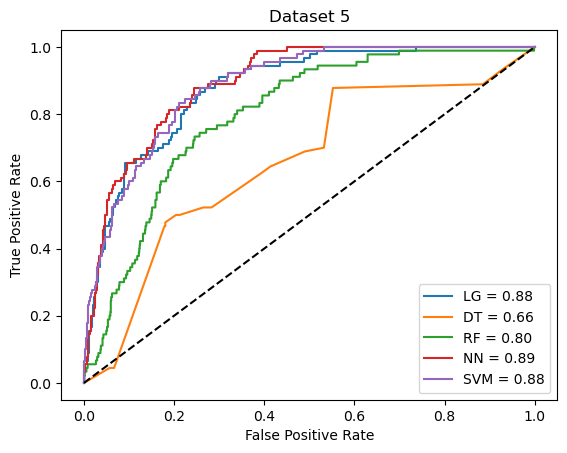

              precision    recall  f1-score   support

           0       0.98      0.78      0.87      1092
           1       0.23      0.80      0.36        90

    accuracy                           0.78      1182
   macro avg       0.61      0.79      0.62      1182
weighted avg       0.92      0.78      0.83      1182
               precision    recall  f1-score   support

           0       0.95      0.79      0.86      1092
           1       0.16      0.50      0.25        90

    accuracy                           0.77      1182
   macro avg       0.56      0.64      0.55      1182
weighted avg       0.89      0.77      0.81      1182
               precision    recall  f1-score   support

           0       0.94      0.91      0.92      1092
           1       0.22      0.32      0.26        90

    accuracy                           0.86      1182
   macro avg       0.58      0.61      0.59      1182
weighted avg       0.89      0.86      0.87      1182
               preci

In [42]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
fpr1, tpr1, thresholds1 = roc_curve(y_test, y_probs1)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_probs2)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_probs3)
fpr4, tpr4, thresholds4 = roc_curve(y_test, y_probs4)
plt.plot(fpr, tpr, label='LG = {:.2f}'.format(auc_score))
plt.plot(fpr1, tpr1, label='DT = {:.2f}'.format(auc_score1))
plt.plot(fpr2, tpr2, label='RF = {:.2f}'.format(auc_score2))
plt.plot(fpr3, tpr3, label='NN = {:.2f}'.format(auc_score3))
plt.plot(fpr4, tpr4, label='SVM = {:.2f}'.format(auc_score4))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Dataset 5')
plt.legend(loc='lower right')
plt.show()
class_report = classification_report(y_test, y_pred)
class_report1 = classification_report(y_test, y_pred1)
class_report2 = classification_report(y_test, y_pred2)
class_report3 = classification_report(y_test, y_pred3)
class_report4 = classification_report(y_test, y_pred4)
print(class_report,class_report1,class_report2,class_report3,class_report4)

## The End